#    # NAME :Ayush kumar kaushik

# Organisation: The Spark Foundation

# Task 1 :Predicting Using Supervised Machine Learning

In given task we have to predict the percentage of marks expected by the student based upon the number of hours they studied.In this task only two variables are involved.

In [42]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [43]:
#Import the Data
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
data1=data
print("The data is imported successfully")
data

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [45]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [46]:
# null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# DATA VISUALIZATION

NOW lets plot a graph of our data so that it will give us clear idea about data.

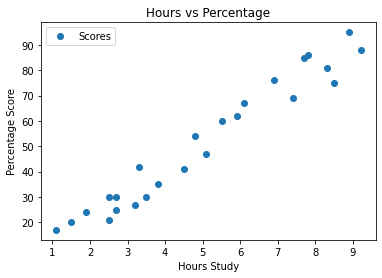

In [47]:
#Plotting the distribution of scores
data.plot(x="Hours", y="Scores", style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Study')
plt.ylabel('Percentage Score')
plt.show()

# Linear Regression Model

Now we prepare the data and split it in test and train data 

In [48]:
#Splitting training and testing data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80, test_size=0.20, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


# Training the model

In [49]:
# Liner regression model
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_test)
print(y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Training the Algorithm

Now the spliting of our data into training and testing sets is done, now it's time to train our algorithm.

In [50]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")


Training complete.


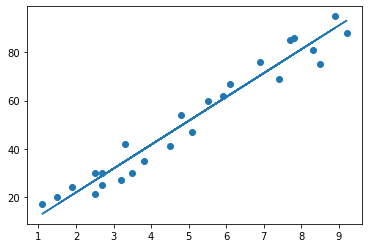

In [51]:
#Plotting Regression line
line = regressor.coef_*x + regressor.intercept_
#Ploting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

# Checking the accuracy scores for training and test set

In [56]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211552


# Now we make predictions

In [57]:
data= pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [58]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))


Score of student who studied for 9.25 hours a dat [93.69173249]


# Model Evaluation Metrics

In [59]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.598769307217456
Mean absolute Error: 4.183859899002982
